<a href="https://colab.research.google.com/github/GildasTaliah/Solutions_with_PyNoteBook/blob/main/CarClaimsInsuranceMod.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Car Insurance Modelling


Insurance companies invest a lot of time and money into optimizing their pricing and accurately estimating the likelihood that customers will make a claim. In many countries insurance it is a legal requirement to have car insurance in order to drive a vehicle on public roads, so the market is very large!

(`Source: https://www.accenture.com/_acnmedia/pdf-84/accenture-machine-leaning-insurance.pdf`)

Knowing all of this, On the Road car insurance have requested your services in building a model to predict whether a customer will make a claim on their insurance during the policy period. As they have very little expertise and infrastructure for deploying and monitoring machine learning models, they've asked you to identify the single feature that results in the best performing model, as measured by accuracy, so they can start with a simple model in production.

Consider we have been supplied with their customer data as a csv file called `car_insurance.csv`, along with a table detailing the column names and descriptions below.



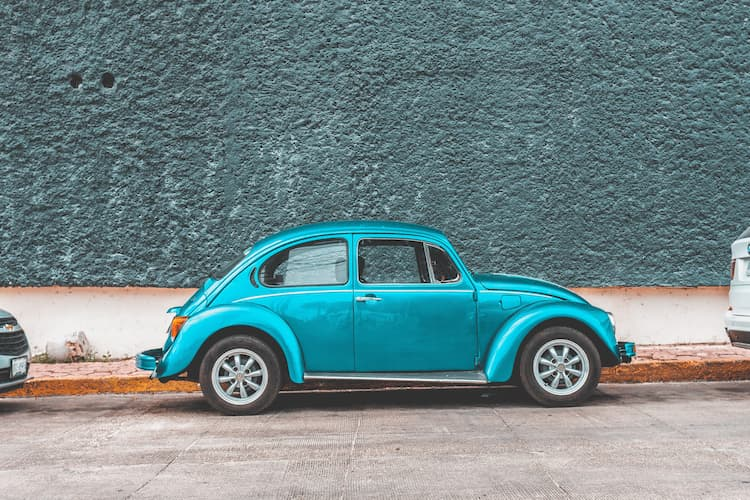

In [2]:
# Import required modules
import pandas as pd
import numpy as np
from statsmodels.formula.api import logit

# Read in dataset
cars = pd.read_csv("car_insurance.csv")

# Check for missing values
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   id                   10000 non-null  int64  
 1   age                  10000 non-null  int64  
 2   gender               10000 non-null  int64  
 3   driving_experience   10000 non-null  object 
 4   education            10000 non-null  object 
 5   income               10000 non-null  object 
 6   credit_score         9018 non-null   float64
 7   vehicle_ownership    10000 non-null  float64
 8   vehicle_year         10000 non-null  object 
 9   married              10000 non-null  float64
 10  children             10000 non-null  float64
 11  postal_code          10000 non-null  int64  
 12  annual_mileage       9043 non-null   float64
 13  vehicle_type         10000 non-null  object 
 14  speeding_violations  10000 non-null  int64  
 15  duis                 10000 non-null  

In [7]:
# Describe
cars.describe()

,id,age,gender,credit_score,vehicle_ownership,married,children,postal_code,annual_mileage,speeding_violations,duis,past_accidents,outcome
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000
mean,500521.906800,1.489500,0.499000,0.515813,0.697000,0.498200,0.688800,19864.548400,11697.003207,1.482900,0.23920,1.056300,0.313300
std,290030.768758,1.025278,0.500024,0.130752,0.459578,0.500022,0.463008,18915.613855,2680.167384,2.241966,0.55499,1.652454,0.463858
min,101.000000,0.000000,0.000000,0.053358,0.000000,0.000000,0.000000,10238.000000,2000.000000,0.000000,0.00000,0.000000,0.000000
25%,249638.500000,1.000000,0.000000,0.431509,0.000000,0.000000,0.000000,10238.000000,10000.000000,0.000000,0.00000,0.000000,0.000000
50%,501777.000000,1.000000,0.000000,0.515813,1.000000,0.000000,1.000000,10238.000000,11697.003207,0.000000,0.00000,0.000000,0.000000
75%,753974.500000,2.000000,1.000000,0.607607,1.000000,1.000000,1.000000,32765.000000,13000.000000,2.000000,0.00000,2.000000,1.000000
max,999976.000000,3.000000,1.000000,0.960819,1.000000,1.000000,1.000000,92101.000000,22000.000000,22.000000,6.00000,15.000000,1.000000


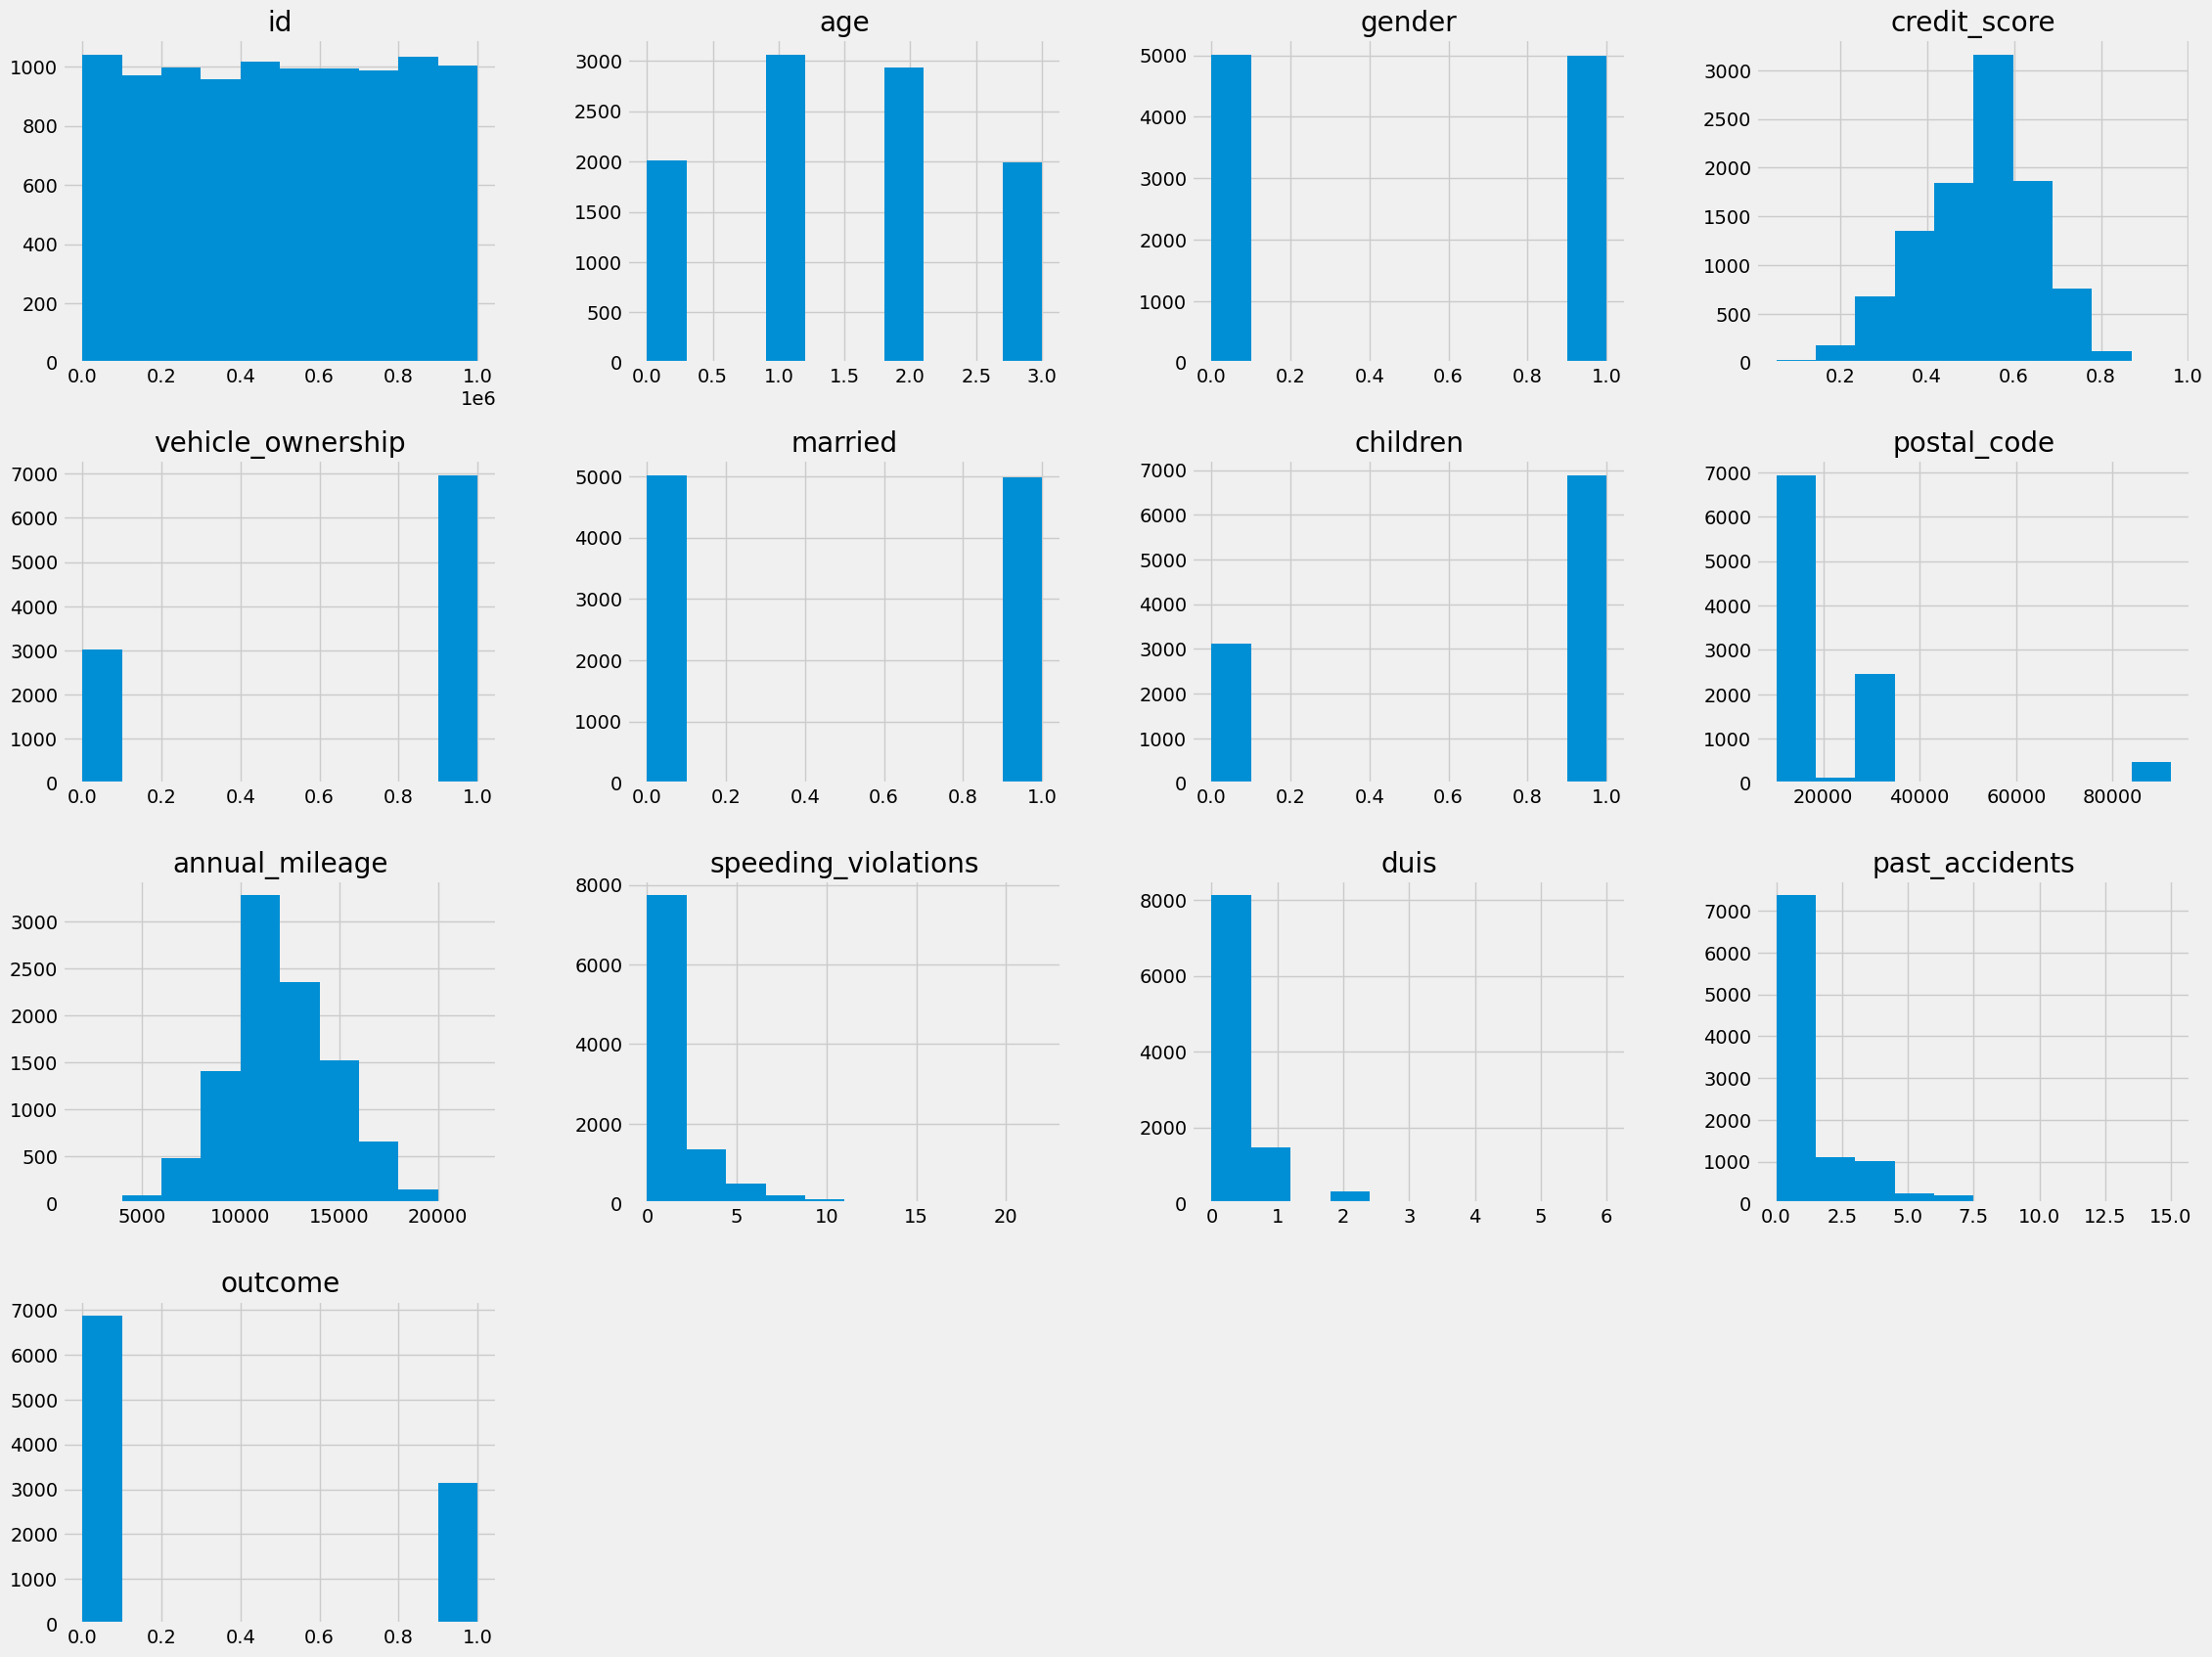

In [14]:
# import warnings
import warnings
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

# import matplotlib
import matplotlib.pyplot as plt

# View hist
cars.hist(figsize=(25, 20))
plt.show()

In [11]:
# Fill missing values with the mean
cars["credit_score"].fillna(cars["credit_score"].mean(), inplace=True)
cars["annual_mileage"].fillna(cars["annual_mileage"].mean(), inplace=True)

# Empty list to store model results
models = []

# Feature columns
features = cars.drop(columns=["id", "outcome"]).columns

# Loop through features
for col in features:
    # Create a model
    model = logit(f"outcome ~ {col}", data=cars).fit()
    # Add each model to the models list
    models.append(model)

Optimization terminated successfully.
         Current function value: 0.511794
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.615951
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.467092
         Iterations 8
Optimization terminated successfully.
         Current function value: 0.603742
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.531499
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.572557
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.552412
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.572668
         Iterations 6
Optimization terminated successfully.
         Current function value: 0.586659
         Iterations 5
Optimization terminated successfully.
         Current function value: 0.595431
  

In [12]:
# Empty list to store accuracies
accuracies = []

# Loop through models
for feature in range(0, len(models)):
    # Compute the confusion matrix
    conf_matrix = models[feature].pred_table()
    # True negatives
    tn = conf_matrix[0,0]
    # True positives
    tp = conf_matrix[1,1]
    # False negatives
    fn = conf_matrix[1,0]
    # False positives
    fp = conf_matrix[0,1]
    # Compute accuracy
    acc = (tn + tp) / (tn + fn + fp + tp)
    accuracies.append(acc)

# Find the feature with the largest accuracy
best_feature = features[accuracies.index(max(accuracies))]

# Create best_feature_df
best_feature_df = pd.DataFrame({"best_feature": best_feature,
                                "best_accuracy": max(accuracies)},
                                index=[0])
best_feature_df

,best_feature,best_accuracy
0,driving_experience,0.7771


 > **Driving experience** is the most significant determinant of whether a client would **make a claim**.


In [ ]:
# The End !!